# Option data: descriptive analysis

- loading data from csv files takes quite a while

In [1]:
@time include("../startup_script2.jl")

elapsed time: 0.660826867 seconds (52396500 bytes allocated, 6.87% gc time)
elapsed time: 56.71764759 seconds (5419744236 bytes allocated, 72.61% gc time)
elapsed time: 0.799856589 seconds (112671656 bytes allocated, 58.75% gc time)
elapsed time: 75.433179017 seconds (5419744236 bytes allocated, 78.77% gc time)
elapsed time: 159.443030618 seconds (14792605808 bytes allocated, 65.65% gc time)
elapsed time: 90.28158885 seconds (5419744236 bytes allocated, 82.42% gc time)
elapsed time: 102.674447479 seconds (5419744236 bytes allocated, 83.82% gc time)
elapsed time: 384.477813497 seconds (30386405492 bytes allocated, 72.99% gc time)


,Date,ID,IV
1,2006-07-03,c_20060721_4500,NA
2,2006-07-04,c_20060721_4500,NA
3,2006-07-05,c_20060721_4500,NA
4,2006-07-06,c_20060721_4500,NA
5,2006-07-07,c_20060721_4500,NA
6,2006-07-10,c_20060721_4500,NA


- option prices are observed during the following time range:

In [2]:
minimum(optPrices[:Date]), maximum(optPrices[:Date])

(2006-07-03,2013-12-30)

- expiration dates are within:

In [3]:
minimum(opts[:Expiry]), maximum(opts[:Expiry])

(2006-07-21,2014-12-19)

### Relational database

- originally data was given as single table

In [4]:
origData = join(optPrices, opts, on = :ID) |>
x -> join(x, cohortParams, on = [:Date, :Expiry]) |>
x -> join(x, daxVals, on = [:Date]) |>
x -> join(x, addObs, on = [:Date, :ID])

,Date,ID,Price,Expiry,Strike,IsCall,EONIA_matched,Time_to_Maturity,DAX,Bid,Ask,Volume,Open_Interest
1,2006-07-03,c_20060721_4500,1212.0,2006-07-21,4500,true,0.0283102283088403,0.0549019607843137,5712.69,NA,NA,0,127
2,2006-07-04,c_20060721_4500,1232.6,2006-07-21,4500,true,0.0282186257343229,0.0509803921568627,5729.01,NA,NA,0,127
3,2006-07-05,c_20060721_4500,1131.1,2006-07-21,4500,true,0.0281095973321041,0.0470588235294118,5625.63,NA,NA,0,127
4,2006-07-06,c_20060721_4500,1197.0,2006-07-21,4500,true,0.0281618489048387,0.0431372549019608,5695.47,NA,NA,2,127
5,2006-07-07,c_20060721_4500,1185.1,2006-07-21,4500,true,0.0281130672686915,0.0392156862745098,5681.85,NA,NA,0,127
6,2006-07-10,c_20060721_4500,1210.3,2006-07-21,4500,true,0.0281756309615022,0.0352941176470588,5706.32,NA,NA,0,127
7,2006-07-11,c_20060721_4500,1125.9,2006-07-21,4500,true,0.0281527617515408,0.0313725490196078,5616.04,NA,NA,0,127
8,2006-07-12,c_20060721_4500,1134.8,2006-07-21,4500,true,0.0281460121797738,0.0274509803921569,5637.82,NA,NA,0,127
9,2006-07-13,c_20060721_4500,1032.0,2006-07-21,4500,true,0.0281552563922728,0.0235294117647059,5527.29,NA,NA,0,127
10,2006-07-14,c_20060721_4500,928.4,2006-07-21,4500,true,0.0281208757166548,0.0196078431372549,5422.22,NA,NA,0,127


- number of puts and calls: options

In [5]:
nOpts, nCalls, nPuts = size(opts, 1), size(opts[opts[:IsCall], :], 1), size(opts[!opts[:IsCall], :], 1)
println("The sample consists of data on $nOpts options:")
println("- $nCalls call options")
println("- $nPuts put options")

The sample consists of data on 12917 options:
- 6321 call options
- 6596 put options


- observations:

In [6]:
nObs, nCallObs, nPutObs = size(origData, 1), size(origData[origData[:IsCall], :], 1), size(origData[!origData[:IsCall], :], 1)
println("The sample consists of $nObs observations:")
println("- call options: $nCallObs observations")
println("- put options: $nPutObs observations")

The sample consists of 2025129 observations:
- call options: 987878 observations
- put options: 1037251 observations


- number of missing values per column:

In [7]:
nNAs = DataFrame()
nNAsFreq = DataFrame()
for (nm, dat) in eachcol(origData)
    nNAs[nm] = sum(isna(dat))
    nNAsFreq[nm] = sum(isna(dat))/nObs
end

In [8]:
nNAs[[:Bid, :Ask, :Volume]]

,Bid,Ask,Volume
1,1597934,1574162,11


In [9]:
nNAsFreq[[:Bid, :Ask, :Volume]]

,Bid,Ask,Volume
1,0.7890529442815741,0.7773144328089717,5.431752742664788e-6


### Volume data

In [10]:
naObs = isna(origData[:Volume])
origData[naObs, [:Date, :IsCall, :Strike, :DAX, :Time_to_Maturity]]

,Date,IsCall,Strike,DAX,Time_to_Maturity
1,2008-05-22,true,7000,7070.33,0.337254901960784
2,2008-05-23,true,7000,6944.05,0.333333333333333
3,2007-11-27,true,7800,7531.35,0.803921568627451
4,2008-05-22,true,7800,7070.33,0.337254901960784
5,2008-05-23,true,7800,6944.05,0.333333333333333
6,2007-11-27,true,8800,7531.35,0.803921568627451
7,2008-05-22,true,8800,7070.33,0.337254901960784
8,2008-05-23,true,8800,6944.05,0.333333333333333
9,2007-11-27,false,8800,7531.35,0.803921568627451
10,2008-05-22,false,8800,7070.33,0.337254901960784


- many entries with zero volume

In [11]:
sum(convert(Array, origData[:Volume] .== 0, false)) / nObs

0.7067263369395234

- plot non-zero values

In [12]:
using Gadfly

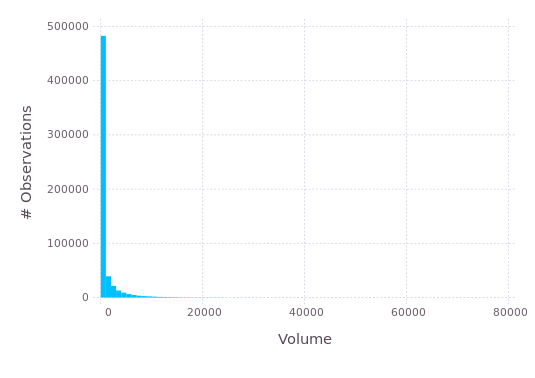

In [13]:
nonZeroInds = convert(Array, origData[:Volume] .!= 0, false)

currPlot = Gadfly.plot(x=origData[:Volume][nonZeroInds], Gadfly.Geom.histogram, 
Scale.y_continuous(labels=x -> @sprintf("%6.0f", x)),
Scale.x_continuous(labels=x -> @sprintf("%6.0f", x), minvalue=0, maxvalue=80000),
Guide.xlabel("Volume"),
Guide.ylabel("# Observations"))

In [14]:
draw(SVG("../pics/volume_hist.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/volume_hist.pdf", 20cm, 14cm), currPlot)

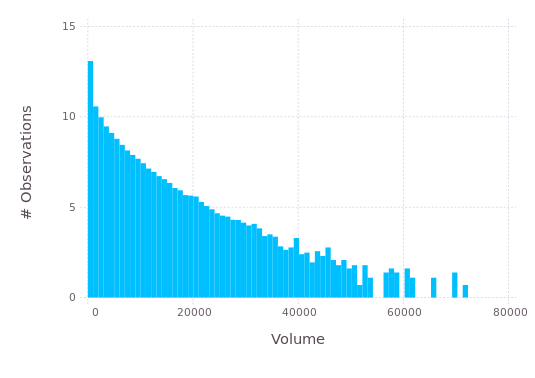

In [15]:
currPlot = Gadfly.plot(x=origData[:Volume][nonZeroInds], Gadfly.Geom.histogram,
Scale.y_log(labels=x -> @sprintf("%6.0f", x)),
Scale.x_continuous(labels=x -> @sprintf("%6.0f", x), minvalue=0, maxvalue=80000),
Guide.xlabel("Volume"),
Guide.ylabel("# Observations"))

In [16]:
draw(SVG("../pics/volume_log_hist.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/volume_log_hist.pdf", 20cm, 14cm), currPlot)

- display volumes greater than 70,000

In [17]:
largeVols = DataFrame(Volume = sort(origData[convert(Array, origData[:Volume] .> 70000, false), :Volume], rev=true))


,Volume
1,149504
2,126367
3,103815
4,88041
5,86313
6,78254
7,77251
8,73883
9,73029
10,72047


### Open interest

- no missing values
- no zero values
- histogram of open interest values

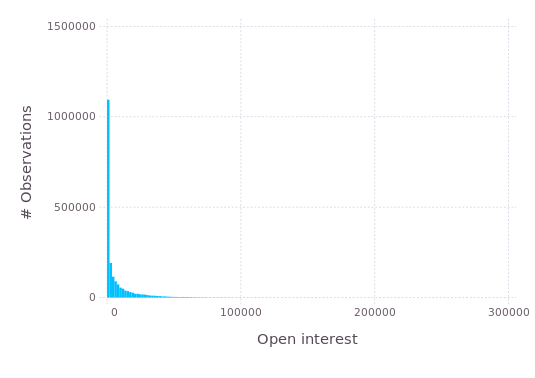

In [22]:
currPlot = Gadfly.plot(x=origData[:Open_Interest], Gadfly.Geom.histogram,
Scale.y_continuous(labels=x -> @sprintf("%6.0f", x)),
Scale.x_continuous(labels=x -> @sprintf("%6.0f", x), minvalue=0),
Guide.xlabel("Open interest"),
Guide.ylabel("# Observations"))

In [23]:
draw(SVG("../pics/open_interest_hist.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/open_interest_hist.pdf", 20cm, 14cm), currPlot)

- on log scale

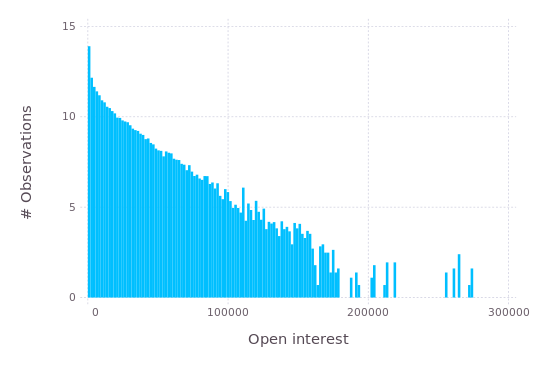

In [24]:
currPlot = Gadfly.plot(x=origData[:Open_Interest], Gadfly.Geom.histogram,
Scale.y_log(labels=x -> @sprintf("%6.0f", x)),
Scale.x_continuous(labels=x -> @sprintf("%6.0f", x), minvalue=0),
Guide.xlabel("Open interest"),
Guide.ylabel("# Observations"))

In [25]:
draw(SVG("../pics/open_interest_log_hist.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/open_interest_log_hist.pdf", 20cm, 14cm), currPlot)

- show paths for random options

In [42]:
# pick random option
nRndOpts = 10
nOpts = size(opts, 1)
rndOpt = Int[rand(1:nOpts) for ii=1:nRndOpts]

10-element Array{Int64,1}:
 10265
    55
    97
 12016
  7073
  5501
  5442
    56
  7259
 12204

In [43]:
# get associated observations
optName = opts[rndOpt, :ID]

10-element DataArray{UTF8String,1}:
 "p_20120921_4750"
 "c_20061215_4750"
 "c_20061215_5800"
 "p_20140321_8900"
 "p_20100416_7500"
 "c_20121221_8800"
 "c_20101217_3500"
 "p_20061215_4750"
 "p_20100716_4800"
 "p_20131018_7450"

In [44]:
rndOptObs = falses(nObs)
for kk=1:nRndOpts
    rndOptObs[origData[:ID] .== optName[kk]] = true
end

In [45]:
rndOptData = origData[rndOptObs, :]

,Date,ID,Price,Expiry,Strike,IsCall,EONIA_matched,Time_to_Maturity,DAX,Bid,Ask,Volume,Open_Interest
1,2006-07-03,c_20061215_4750,1070.0,2006-12-15,4750,true,0.031667592146348,0.466666666666667,5712.69,NA,NA,0,395
2,2006-07-04,c_20061215_4750,1087.0,2006-12-15,4750,true,0.0316330990403555,0.462745098039216,5729.01,NA,NA,0,395
3,2006-07-05,c_20061215_4750,1001.9,2006-12-15,4750,true,0.0316794228551024,0.458823529411765,5625.63,NA,NA,0,395
4,2006-07-06,c_20061215_4750,1058.6,2006-12-15,4750,true,0.0317404205553094,0.454901960784314,5695.47,NA,NA,0,395
5,2006-07-07,c_20061215_4750,1047.7,2006-12-15,4750,true,0.0319058935692387,0.450980392156863,5681.85,NA,NA,0,395
6,2006-07-10,c_20061215_4750,1067.9,2006-12-15,4750,true,0.0318796896070348,0.447058823529412,5706.32,NA,NA,0,395
7,2006-07-11,c_20061215_4750,994.5,2006-12-15,4750,true,0.0318611387521966,0.443137254901961,5616.04,NA,NA,0,395
8,2006-07-12,c_20061215_4750,1000.5,2006-12-15,4750,true,0.0318827903300907,0.43921568627451,5637.82,NA,NA,0,395
9,2006-07-13,c_20061215_4750,915.9,2006-12-15,4750,true,0.0318770943078985,0.435294117647059,5527.29,NA,NA,0,395
10,2006-07-14,c_20061215_4750,828.4,2006-12-15,4750,true,0.031837249713853,0.431372549019608,5422.22,NA,NA,0,395


In [46]:
plotData = rndOptData[[:Open_Interest, :Time_to_Maturity, :ID]]
plotData[:Time_to_Maturity] = round(plotData[:Time_to_Maturity]*255*(-1))

plotData

,Open_Interest,Time_to_Maturity,ID
1,395,-119.0,c_20061215_4750
2,395,-118.0,c_20061215_4750
3,395,-117.0,c_20061215_4750
4,395,-116.0,c_20061215_4750
5,395,-115.0,c_20061215_4750
6,395,-114.0,c_20061215_4750
7,395,-113.0,c_20061215_4750
8,395,-112.0,c_20061215_4750
9,395,-111.0,c_20061215_4750
10,395,-110.0,c_20061215_4750


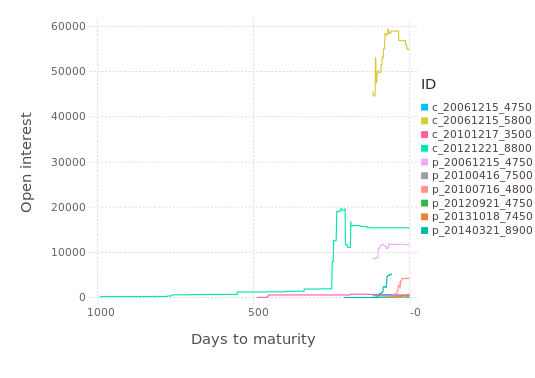

In [48]:
currPlot = plot(plotData, x=:Time_to_Maturity,  y=:Open_Interest, color=:ID, Geom.line,
Scale.x_continuous(labels=x -> @sprintf("%6.0f", -x)),
Scale.y_continuous(labels=x -> @sprintf("%6.0f", x)),
Guide.xlabel("Days to maturity"),
Guide.ylabel("Open interest"))

In [49]:
draw(SVG("../pics/open_interest_over_time.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/open_interest_over_time.pdf", 20cm, 14cm), currPlot)

### Listed options

- count numbers of listed options each day

In [50]:
listData = join(optPrices, opts, on = :ID);
head(listData)

,Date,ID,Price,Expiry,Strike,IsCall
1,2006-07-03,c_20060721_4500,1212.0,2006-07-21,4500,true
2,2006-07-04,c_20060721_4500,1232.6,2006-07-21,4500,true
3,2006-07-05,c_20060721_4500,1131.1,2006-07-21,4500,true
4,2006-07-06,c_20060721_4500,1197.0,2006-07-21,4500,true
5,2006-07-07,c_20060721_4500,1185.1,2006-07-21,4500,true
6,2006-07-10,c_20060721_4500,1210.3,2006-07-21,4500,true


- define function to count calls and puts separately

In [51]:
function countCallsAndPuts(x::AbstractDataFrame)
    nCalls = sum(x[:IsCall])
    nPuts = size(x, 1) - nCalls
    return [nCalls nPuts]
end

countCallsAndPuts (generic function with 1 method)

- count calls and puts and convert to `Timematr` for plotting

In [54]:
using TimeData

optsPerDate = by(listData, :Date, x -> countCallsAndPuts(x))
names!(optsPerDate, [:Date, :nCalls, :nPuts])

optsPerDateTm = Timematr(optsPerDate[:, [2, 3]], convert(Array, optsPerDate[:Date]))

,idx,nCalls,nPuts
1,2006-07-03,455.0,481.0
2,2006-07-04,456.0,481.0
3,2006-07-05,457.0,481.0
4,2006-07-06,457.0,481.0
5,2006-07-07,457.0,481.0
6,2006-07-10,456.0,481.0
7,2006-07-11,456.0,482.0
8,2006-07-12,456.0,483.0
9,2006-07-13,457.0,486.0
10,2006-07-14,457.0,486.0


In [55]:
loadPlotting()

wstHist (generic function with 4 methods)

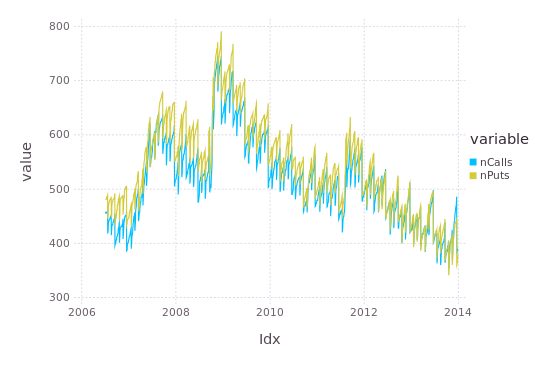

In [56]:
currPlot = gdfPlot(optsPerDateTm)

In [57]:
draw(SVG("../pics/number_of_listed_options.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/number_of_listed_options.pdf", 20cm, 14cm), currPlot)

- count number of different listed maturities

In [58]:
expiryPerDate = by(listData, :Date, x -> length(unique(x[:Expiry])))
names!(expiryPerDate, [:Date, :nExpiry])

expiryPerDateTm = Timematr(expiryPerDate[:, [2]], convert(Array, expiryPerDate[:Date]))

,idx,nExpiry
1,2006-07-03,11.0
2,2006-07-04,11.0
3,2006-07-05,11.0
4,2006-07-06,11.0
5,2006-07-07,11.0
6,2006-07-10,11.0
7,2006-07-11,11.0
8,2006-07-12,11.0
9,2006-07-13,12.0
10,2006-07-14,12.0


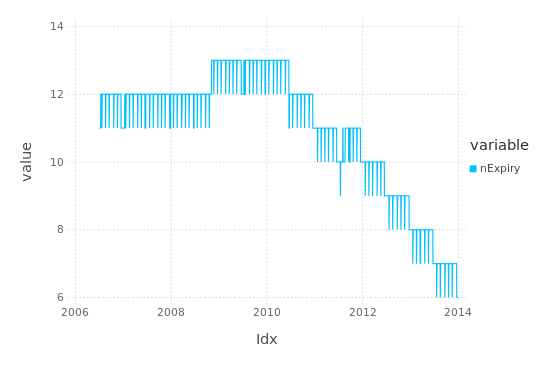

In [59]:
currPlot = gdfPlot(expiryPerDateTm)

In [60]:
draw(SVG("../pics/number_of_listed_maturities.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/number_of_listed_maturities.pdf", 20cm, 14cm), currPlot)

- get first listing for option, but exclude option price series starting at first day of sample
- they are not most likely not observed from the first day of listing

In [61]:
firstListData = join(optPrices, opts, on = :ID) |>
x -> join(x, cohortParams, on = [:Date, :Expiry])

head(firstListData)

,Date,ID,Price,Expiry,Strike,IsCall,EONIA_matched,Time_to_Maturity
1,2006-07-03,c_20060721_4500,1212.0,2006-07-21,4500,true,0.0283102283088403,0.0549019607843137
2,2006-07-03,c_20060721_4600,1112.3,2006-07-21,4600,true,0.0283102283088403,0.0549019607843137
3,2006-07-03,c_20060721_4700,1012.7,2006-07-21,4700,true,0.0283102283088403,0.0549019607843137
4,2006-07-03,c_20060721_4800,913.2,2006-07-21,4800,true,0.0283102283088403,0.0549019607843137
5,2006-07-03,c_20060721_4850,863.5,2006-07-21,4850,true,0.0283102283088403,0.0549019607843137
6,2006-07-03,c_20060721_4900,813.9,2006-07-21,4900,true,0.0283102283088403,0.0549019607843137


- define function to get first listing of given option

In [63]:
function getFirstListing(x::AbstractDataFrame)
    firstInd = indmin(x[:Date]) 
    return x[firstInd, [:Date, :Price, :Expiry, :Strike, :IsCall, :EONIA_matched, :Time_to_Maturity]]
end

getFirstListing (generic function with 1 method)

In [64]:
firstObs = by(firstListData, :ID, getFirstListing)
head(firstObs)

,ID,Date,Price,Expiry,Strike,IsCall,EONIA_matched,Time_to_Maturity
1,c_20060721_4500,2006-07-03,1212.0,2006-07-21,4500,true,0.0283102283088403,0.0549019607843137
2,c_20060721_4600,2006-07-03,1112.3,2006-07-21,4600,true,0.0283102283088403,0.0549019607843137
3,c_20060721_4700,2006-07-03,1012.7,2006-07-21,4700,true,0.0283102283088403,0.0549019607843137
4,c_20060721_4800,2006-07-03,913.2,2006-07-21,4800,true,0.0283102283088403,0.0549019607843137
5,c_20060721_4850,2006-07-03,863.5,2006-07-21,4850,true,0.0283102283088403,0.0549019607843137
6,c_20060721_4900,2006-07-03,813.9,2006-07-21,4900,true,0.0283102283088403,0.0549019607843137


- add time to maturity in days

In [65]:
daysToMat = DataFrame(Days_to_Maturity = round(firstObs[:Time_to_Maturity] * 255))
firstObsExt = [firstObs daysToMat]
head(firstObsExt)

,ID,Date,Price,Expiry,Strike,IsCall,EONIA_matched,Time_to_Maturity,Days_to_Maturity
1,c_20060721_4500,2006-07-03,1212.0,2006-07-21,4500,true,0.0283102283088403,0.0549019607843137,14.0
2,c_20060721_4600,2006-07-03,1112.3,2006-07-21,4600,true,0.0283102283088403,0.0549019607843137,14.0
3,c_20060721_4700,2006-07-03,1012.7,2006-07-21,4700,true,0.0283102283088403,0.0549019607843137,14.0
4,c_20060721_4800,2006-07-03,913.2,2006-07-21,4800,true,0.0283102283088403,0.0549019607843137,14.0
5,c_20060721_4850,2006-07-03,863.5,2006-07-21,4850,true,0.0283102283088403,0.0549019607843137,14.0
6,c_20060721_4900,2006-07-03,813.9,2006-07-21,4900,true,0.0283102283088403,0.0549019607843137,14.0


- remove options starting at sample begin because most likely we do not have their real first listing

In [66]:
cleanFirstObs = firstObsExt[!(firstObsExt[:Date] .== Date(2006,7,3)), :]
head(cleanFirstObs)

,ID,Date,Price,Expiry,Strike,IsCall,EONIA_matched,Time_to_Maturity,Days_to_Maturity
1,c_20060818_4500,2006-07-20,1057.5,2006-08-18,4500,true,0.0291086868858807,0.0823529411764706,21.0
2,c_20061020_4200,2006-10-04,1856.7,2006-10-20,4200,true,0.0322168040461548,0.0470588235294118,12.0
3,c_20061020_4250,2006-08-17,1607.3,2006-10-20,4250,true,0.0312314076945567,0.180392156862745,46.0
4,c_20061020_4500,2006-09-14,1423.6,2006-10-20,4500,true,0.031120566087487,0.101960784313725,26.0
5,c_20061020_4600,2006-09-18,1340.8,2006-10-20,4600,true,0.0311395009574763,0.0941176470588235,24.0
6,c_20061020_4700,2006-09-14,1224.8,2006-10-20,4700,true,0.031120566087487,0.101960784313725,26.0


- how many options are removed because their history is not fully observed?

In [67]:
[size(firstObsExt, 1) size(cleanFirstObs, 1)]

1x2 Array{Int64,2}:
 12917  11981

In [68]:
size(firstObsExt, 1) - size(cleanFirstObs, 1)

936

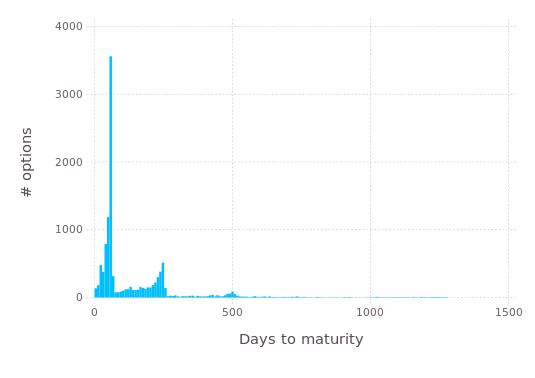

In [69]:
currPlot = Gadfly.plot(cleanFirstObs, x="Days_to_Maturity", Gadfly.Geom.histogram,
Scale.y_continuous(labels=x -> @sprintf("%6.0f", x)),
Guide.xlabel("Days to maturity"),
Guide.ylabel("# options"))

In [70]:
draw(SVG("../pics/maturity_at_first_list.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/maturity_at_first_list.pdf", 20cm, 14cm), currPlot)

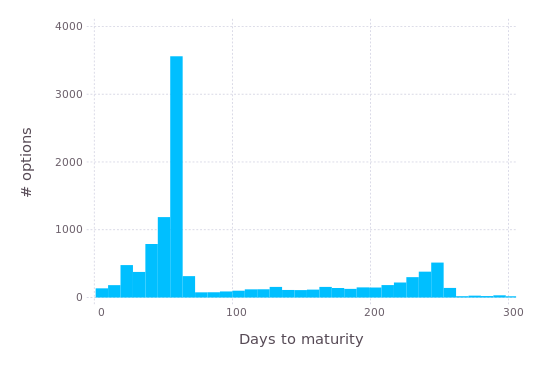

In [79]:
currPlot = Gadfly.plot(cleanFirstObs, x="Days_to_Maturity", Gadfly.Geom.histogram,
Scale.y_continuous(labels=x -> @sprintf("%6.0f", x)),
Scale.x_continuous(labels=x -> @sprintf("%6.0f", x), maxvalue = 270),
Guide.xlabel("Days to maturity"),
Guide.ylabel("# options"))

In [80]:
draw(SVG("../pics/maturity_at_first_list_zoomed.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/maturity_at_first_list_zoomed.pdf", 20cm, 14cm), currPlot)

### Price inconsistencies

In [81]:
consistData = join(optPrices, opts, on = :ID) |>
x -> join(x, cohortParams, on = [:Date, :Expiry]) |>
x -> join(x, daxVals, on = :Date)

head(consistData)

,Date,ID,Price,Expiry,Strike,IsCall,EONIA_matched,Time_to_Maturity,DAX
1,2006-07-03,c_20060721_4500,1212.0,2006-07-21,4500,true,0.0283102283088403,0.0549019607843137,5712.69
2,2006-07-03,c_20060721_4600,1112.3,2006-07-21,4600,true,0.0283102283088403,0.0549019607843137,5712.69
3,2006-07-03,c_20060721_4700,1012.7,2006-07-21,4700,true,0.0283102283088403,0.0549019607843137,5712.69
4,2006-07-03,c_20060721_4800,913.2,2006-07-21,4800,true,0.0283102283088403,0.0549019607843137,5712.69
5,2006-07-03,c_20060721_4850,863.5,2006-07-21,4850,true,0.0283102283088403,0.0549019607843137,5712.69
6,2006-07-03,c_20060721_4900,813.9,2006-07-21,4900,true,0.0283102283088403,0.0549019607843137,5712.69


In [ ]:
function callLowBound(s::Float64, k::Int, r::Float64, T::Float64)
    return maximum([s - k*exp(-r*T), 0])
end

function putLowBound(s::Float64, k::Int, r::Float64, T::Float64)
    return maximum([k*exp(-r*T - s), 0])
end